In [1]:
import pandas as pd
import matplotlib
import seaborn
from pandas import DataFrame

In [54]:
def generate_plots(results_path, x_var, y_var, figure_path):
    results = pd.read_csv(results_path)
    matplotlib.pyplot.clf()
    dotplot = seaborn.scatterplot(data=results, x=x_var, y=y_var, hue="model", style="model", s = 115,
                                  sizes=(50, 100), palette="crest", legend="full")
    dotplot.legend(loc='center right', bbox_to_anchor=(1.4, 0.60), facecolor="inherit", edgecolor="inherit", ncol=1,
               fontsize='small')

    dotplot.tick_params(axis='x', rotation=20, labelsize="x-small")
    dotplot.tick_params(axis='y', rotation=20, labelsize="x-small")

    figure = dotplot.get_figure()
    figure.savefig(figure_path, dpi=1200, bbox_inches="tight")

In [51]:
def generate_metrics_plots(results_path, figure_path):
    results = pd.read_csv(results_path)
    df = DataFrame(columns = ["model", "metric", "metric value"])
    j=0
    results = results.sort_values(by="f1", ascending=False)
    for i, row in results.iterrows():
        for metric in ["f1", "recall", "precision"]:

            df.at[j, "model"] = row["model"]
            df.at[j, "metric"] = metric
            df.at[j, "metric value"] = row[metric]

            j+=1

    plot = seaborn.catplot(x='model', y='metric value', hue='metric', data=df, kind='bar', palette="cubehelix")
    seaborn.move_legend(plot, "center right", bbox_to_anchor=(1.1, 1))
    plot.set_xticklabels(rotation=70)
    plot.set(ylim=(0, 1))
    plot.fig.tight_layout()
    figure = plot.fig.get_figure()
    figure.savefig(figure_path, dpi=1200, bbox_inches="tight")

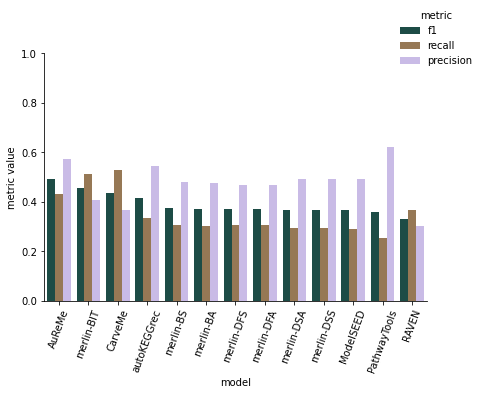

In [71]:
generate_metrics_plots("../Results/Bpertussis/Bpertussis_metanetx_conversion_results.csv", "../Results/Bpertussis/reactions_bar_plot.png")

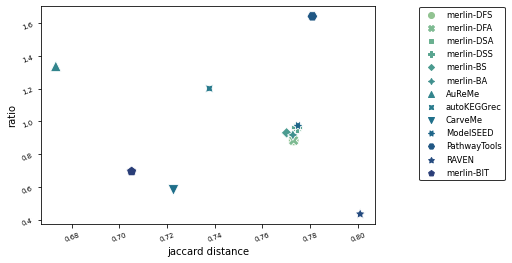

In [72]:
generate_plots("../Results/Bpertussis/Bpertussis_metanetx_conversion_results.csv",
               "jaccard distance", "ratio", "../Results/Bpertussis/reactions_dot_plot.png")

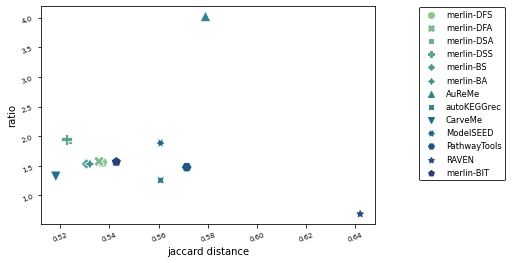

In [73]:
generate_plots("../Results/Bpertussis/Bpertussis_genes_results.csv", "jaccard distance", "ratio", "../Results/Bpertussis/gene_dot_plot.png")

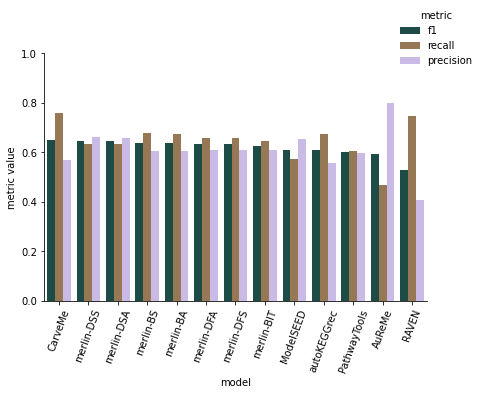

In [74]:
generate_metrics_plots("../Results/Bpertussis/Bpertussis_genes_results.csv", "../Results/Bpertussis/gene_bar_plot.png")

# L. plantarum Results

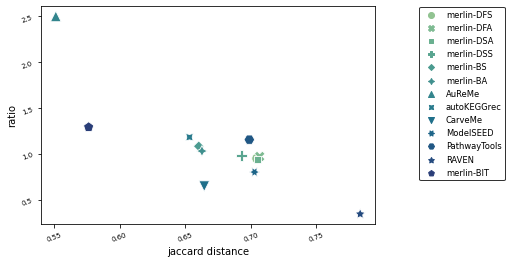

In [58]:
generate_plots("../Results/Lplantarum/Lplantarum_metanetx_conversion_results.csv",
               "jaccard distance", "ratio", "../Results/Lplantarum/reactions_dot_plot.png")

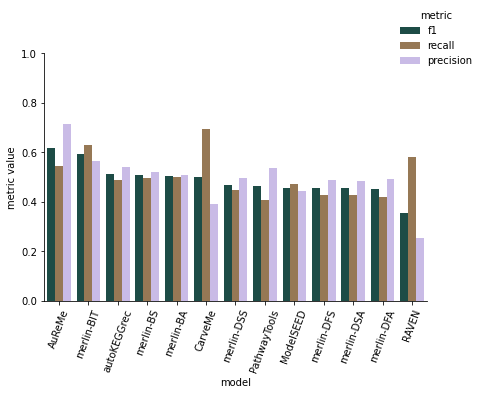

In [59]:
generate_metrics_plots("../Results/Lplantarum/Lplantarum_metanetx_conversion_results.csv", "../Results/Lplantarum/reactions_bar_plot.png")

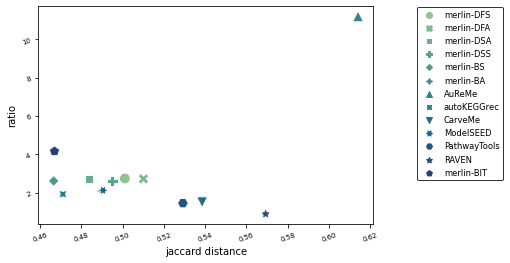

In [60]:
generate_plots("../Results/Lplantarum/Lplantarum_genes_results.csv", "jaccard distance", "ratio", "../Results/Lplantarum/genes_dot_plot.png")

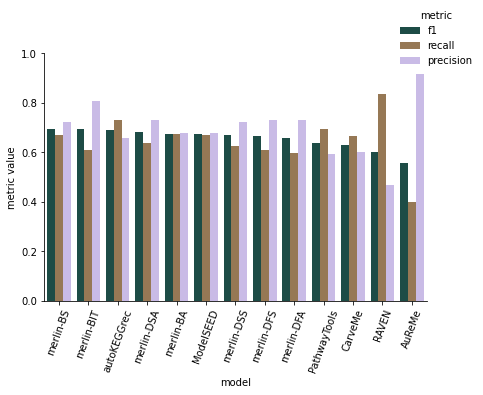

In [61]:
generate_metrics_plots("../Results/Lplantarum/Lplantarum_genes_results.csv", "../Results/Lplantarum/genes_bar_plot.png")

# T. gondii Results

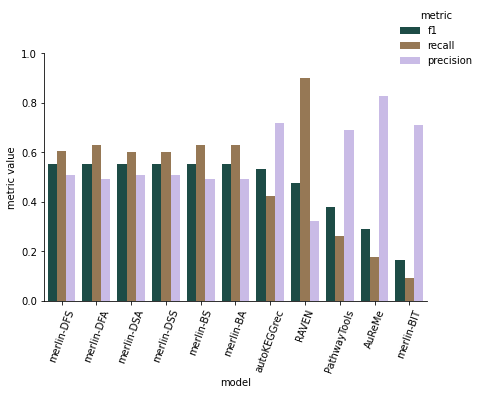

In [62]:
generate_metrics_plots("../Results/Tgondii/Tgondii_metanetx_conversion_results.csv",
                       "../Results/Tgondii/reactions_bar_plot.png")

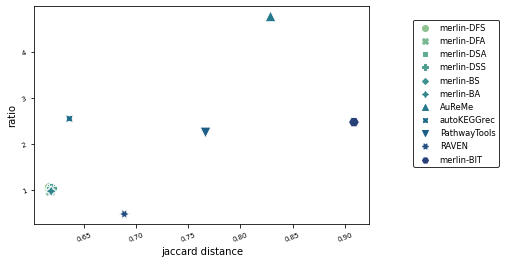

In [63]:
generate_plots("../Results/Tgondii/Tgondii_metanetx_conversion_results.csv", "jaccard distance", "ratio", "../Results/Tgondii/reactions_dot_plot.png")

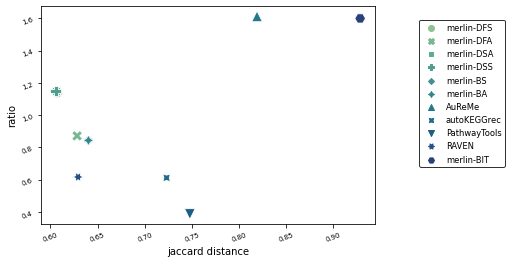

In [64]:
generate_plots("../Results/Tgondii/Tgondii_genes_results.csv", "jaccard distance", "ratio", "../Results/Tgondii/genes_dot_plot.png")

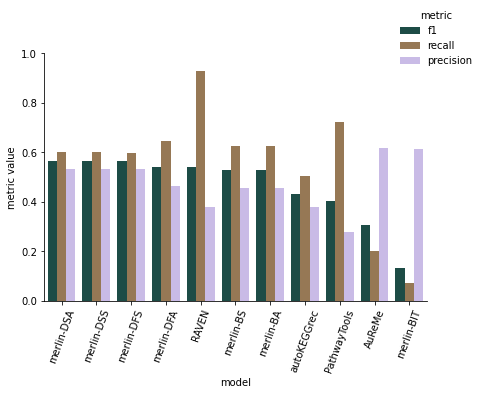

In [65]:
generate_metrics_plots("../Results/Tgondii/Tgondii_genes_results.csv",
                       "../Results/Tgondii/genes_bar_plot.png")